In [245]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

from nltk.corpus import words
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix

df = pd.read_csv('email_spam.csv')

print(df.head())


                                               title  \
0                          ?? the secrets to SUCCESS   
1                    ?? You Earned 500 GCLoot Points   
2                         ?? Your GitHub launch code   
3  [The Virtual Reward Center] Re: ** Clarifications   
4  10-1 MLB Expert Inside, Plus Everything You Ne...   

                                                text      type  
0  Hi James,\n\nHave you claim your complimentary...      spam  
1  \nalt_text\nCongratulations, you just earned\n...  not spam  
2  Here's your GitHub launch code, @Mortyj420!\n ...  not spam  
3  Hello,\n \nThank you for contacting the Virtua...  not spam  
4  Hey Prachanda Rawal,\n\nToday's newsletter is ...      spam  


In [265]:
df['content'] = df['title'] + " " + df['text']
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)  # Limit to 5000 features for efficiency
X = vectorizer.fit_transform(df['content']) 

In [249]:
df['spam'] = df['type'].apply(lambda x: 1 if x == 'spam' else 0)

In [253]:
df.sample(5)

,title,text,type,content,spam
37,Junior Admin Assistant,RE: Junior Admin Assistant\n\nDear Hiring Prof...,not spam,Junior Admin Assistant RE: Junior Admin Assis...,0
1,?? You Earned 500 GCLoot Points,"\nalt_text\nCongratulations, you just earned\n...",not spam,?? You Earned 500 GCLoot Points \nalt_text\nCo...,0
46,Notification,"Sir, this is to notify you that our shipment h...",not spam,"Notification Sir, this is to notify you that ...",0
23,English,Sfhdg to iiiiiiuiiiiiiiiiiiii to,spam,English Sfhdg to iiiiiiuiiiiiiiiiiiii to,1
28,Get the Competitive Edge: ?? Project-Winning S...,Hi rehan\n\n \n\nWe're just over halfway throu...,spam,Get the Competitive Edge: ?? Project-Winning S...,1


In [257]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [255]:
X=df['content']
y=df['spam']

In [227]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('classifier', RandomForestClassifier())
])

In [239]:
from scipy.stats import randint, uniform
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

In [259]:
model=RandomForestClassifier(n_estimators=100,random_state=42, class_weight='balanced')

In [261]:
model.fit(x_train,y_train)

ValueError: could not convert string to float: "Your Account Was Accessed From a New Device We noticed a new login\nHello ondiekijohn254@gmail.com, we noticed an unusual login from a device or location you don't usually use.\nWas this you?"

In [152]:
y_pred=model.predict(x_test)

In [155]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 70.59%


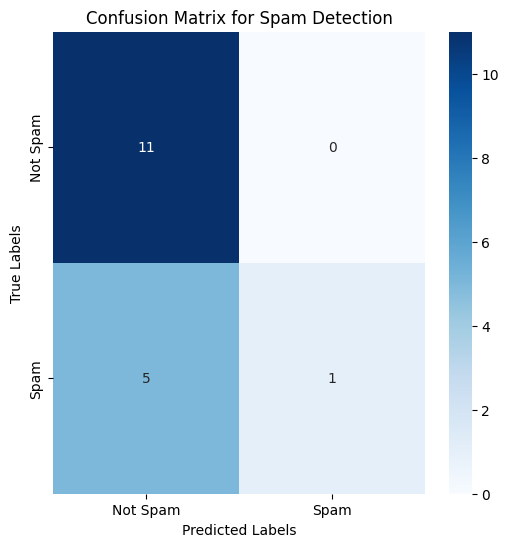

In [157]:
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.title("Confusion Matrix for Spam Detection")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()